In [235]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [236]:
net=cv.dnn.readNetFromTensorflow("graph_opt.pb")   #load weights

In [237]:
inHeight=368
inWidth=368
thr=0.2

In [238]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [228]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]    # MobileNet output [1, 57, -1, -1], we only need the first 19 elements
    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)
    print(points)
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 30), cv.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 2)
    
    return frame

(800, 800, 3)


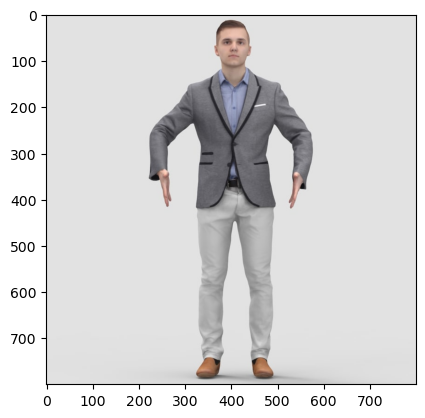

In [229]:
non_biker1 = cv.imread("img.jpg")
print(img.shape)
plt.imshow(cv.cvtColor(non_biker1,cv.COLOR_BGR2RGB))

[(400, 69), (400, 173), (313, 173), (243, 243), (243, 330), (486, 173), (539, 260), (539, 347), (347, 400), (347, 556), (347, 730), (452, 400), (452, 556), (452, 730), (382, 52), (417, 52), (365, 69), (434, 69), (765, 17)]


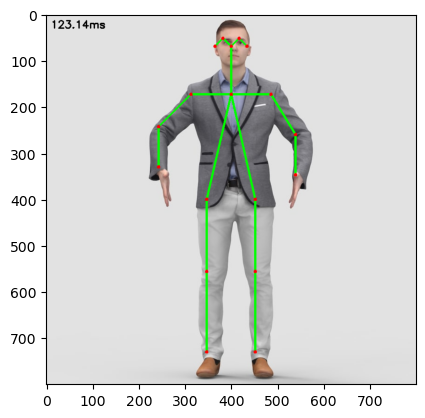

In [230]:
plt.imshow(cv.cvtColor(pose_estimation(non_biker1),cv.COLOR_BGR2RGB))

(613, 700, 3)


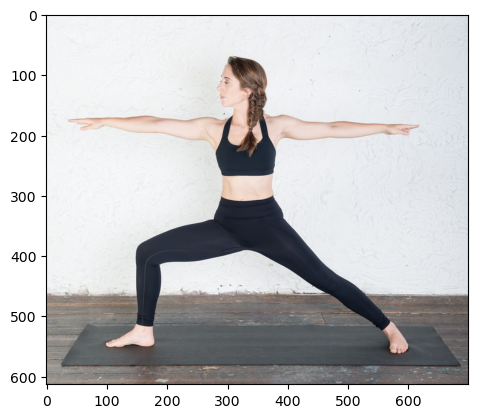

In [132]:
non_biker2=cv.imread("C:/Users/VE00YM828/Desktop/Openpose/wrong.png")
print(non_biker2.shape)
plt.imshow(cv.cvtColor(non_biker2,cv.COLOR_BGR2RGB))

[(273, 119), (319, 186), (304, 186), None, None, (350, 186), None, None, (289, 333), (167, 386), (152, 506), (350, 319), (471, 439), (563, 519), None, (289, 106), None, (319, 119), (684, 26)]


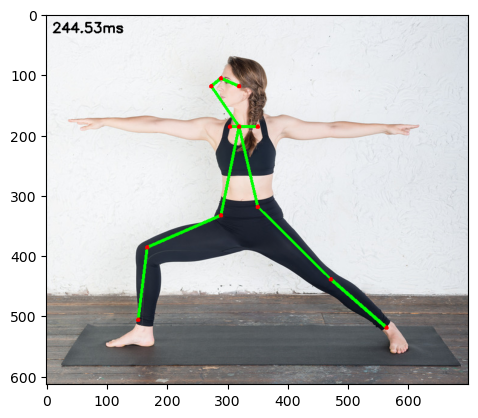

In [133]:
plt.imshow(cv.cvtColor(pose_estimation(non_biker2),cv.COLOR_BGR2RGB))

(315, 474, 3)


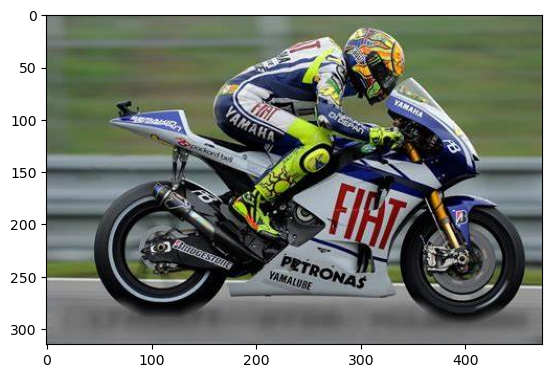

In [140]:
biker1 = cv.imread("img2.jfif")
print(biker1.shape)
plt.imshow(cv.cvtColor(biker1,cv.COLOR_BGR2RGB))

[None, (267, 47), (267, 47), (267, 82), (309, 109), (267, 41), None, None, (195, 89), (257, 116), (195, 171), None, None, None, None, None, None, None, (443, 301)]


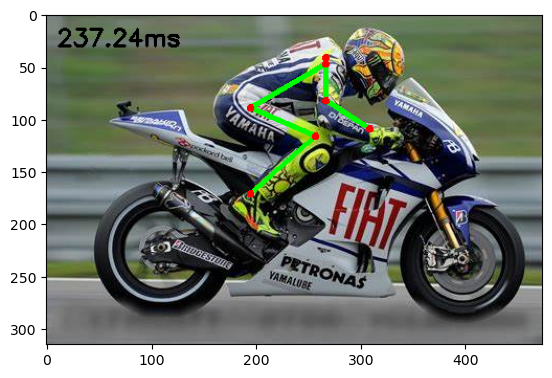

In [141]:
plt.imshow(cv.cvtColor(pose_estimation(biker1),cv.COLOR_BGR2RGB))

(432, 770, 3)


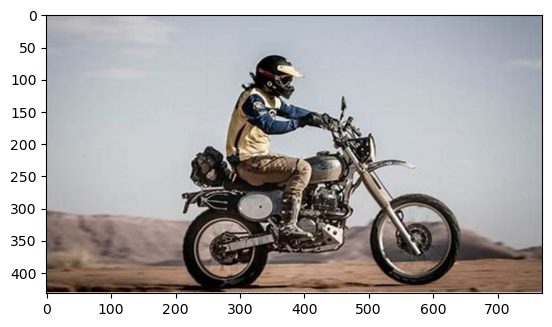

In [142]:
biker2=cv.imread("C:/Users/VE00YM828/Desktop/Openpose/img_biker.jfif")
print(biker2.shape)
plt.imshow(cv.cvtColor(biker2,cv.COLOR_BGR2RGB))

[(368, 103), (334, 122), (318, 131), (334, 169), (401, 159), (351, 131), (368, 150), (401, 159), (301, 216), (401, 225), (368, 328), (318, 225), (435, 225), None, (368, 93), None, (334, 93), None, (686, 0)]


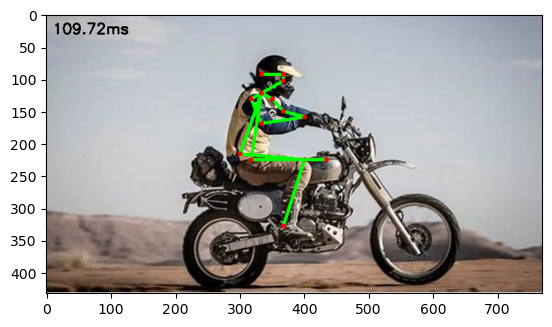

In [143]:
plt.imshow(cv.cvtColor(pose_estimation(biker2),cv.COLOR_BGR2RGB))

(675, 1200, 3)


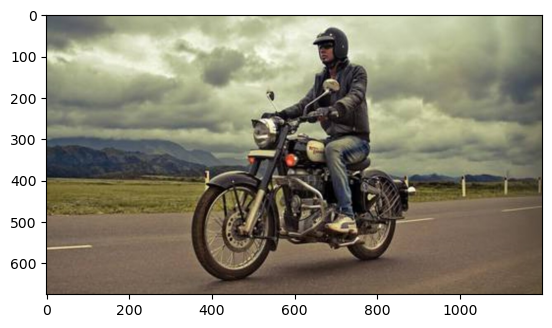

In [144]:
biker3=cv.imread("C:/Users/VE00YM828/Desktop/Openpose/rider3.jpg")
print(biker3.shape)
plt.imshow(cv.cvtColor(biker3,cv.COLOR_BGR2RGB))

[(652, 73), (704, 132), (652, 132), (626, 205), (573, 234), (730, 132), (730, 190), (678, 234), (678, 249), None, None, (730, 264), None, None, (652, 73), (678, 73), None, (704, 73), (0, 0)]


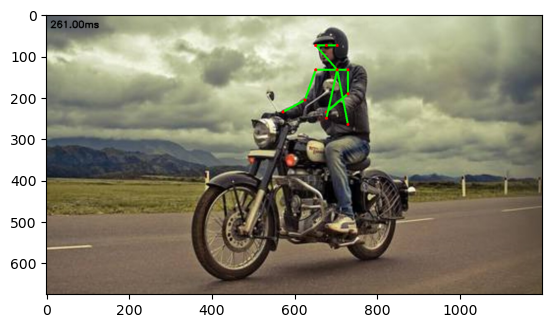

In [145]:
plt.imshow(cv.cvtColor(pose_estimation(biker3),cv.COLOR_BGR2RGB))

In [11]:
cap = cv.VideoCapture(1)
cap.set(cv.CAP_PROP_FPS, 10)
cap.set(3,800)
cap.set(4,800)

if not cap.isOpened():
    cap=cv.VideoCapture(0)
if not cap.isOpened():
    raise IDError("Cannot open webcam")
    
while True:
    hasFrame,frame=cap.read()
    if not hasFrame:
        print("No frame captured from the webcam")
        break
        
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]    # MobileNet output [1, 57, -1, -1], we only need the first 19 elements
    
    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)
    print(points)
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    
    cv.imshow("Pose Estimation Tutorial",frame)

    # Adding break condition
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()

[(347, 333), None, None, None, None, None, None, None, None, None, None, None, None, None, (320, 313), (389, 302), None, (445, 344), (626, 20)]
[(361, 302), None, None, None, None, None, None, None, None, None, None, None, None, None, (320, 271), (389, 271), None, (445, 302), (612, 219)]
[(361, 313), None, None, None, None, None, None, None, None, None, None, None, None, None, (333, 281), (403, 281), None, (445, 313), (626, 198)]
[(375, 323), None, None, None, None, None, None, None, None, None, None, None, None, None, (347, 292), (417, 292), None, (473, 323), (612, 448)]
[(403, 323), None, None, None, None, None, None, None, None, None, None, None, None, None, (375, 302), (445, 302), None, (486, 333), (0, 448)]
[(403, 323), None, None, None, None, None, None, None, None, None, None, None, None, None, (375, 302), (445, 302), None, (486, 333), (626, 20)]
[(375, 323), None, None, None, None, None, None, None, None, None, None, None, None, None, (347, 302), (417, 292), None, (459, 323), (

[(375, 250), (375, 365), None, None, None, None, None, None, None, None, None, None, None, None, (361, 229), (389, 229), (333, 250), (431, 240), (13, 448)]
[(375, 250), None, None, None, None, None, None, None, None, None, None, None, None, None, (361, 240), (403, 229), (333, 250), (431, 250), (13, 448)]
[(389, 260), None, (292, 365), None, None, None, None, None, None, None, None, None, None, None, (361, 240), (403, 240), (333, 260), (431, 250), (13, 448)]
[(389, 250), None, None, None, None, None, None, None, None, None, None, None, None, None, (361, 240), (403, 240), (333, 250), (431, 250), (13, 448)]
[(389, 250), None, (292, 365), None, None, None, None, None, None, None, None, None, None, None, (361, 240), (403, 240), (347, 250), (431, 250), (13, 448)]
[(389, 250), (375, 365), (292, 365), None, None, None, None, None, None, None, None, None, None, None, (361, 240), (403, 229), (333, 250), (431, 250), (13, 448)]
[(375, 250), None, (306, 365), None, None, None, None, None, None, Non

[(389, 156), None, None, None, None, None, None, None, None, None, None, None, None, None, (111, 177), (417, 135), None, (459, 156), (626, 0)]
[(403, 156), None, None, None, None, None, None, None, None, None, None, None, None, None, (125, 177), (431, 135), (69, 187), (473, 156), (626, 0)]
[(403, 146), None, None, None, None, None, None, None, None, None, None, None, None, None, (139, 166), (431, 125), (83, 177), (473, 146), (0, 0)]
[(403, 156), None, None, None, None, None, None, None, None, None, None, None, None, None, (139, 166), (431, 125), (83, 187), (473, 146), (0, 0)]
[(417, 156), None, None, None, None, None, None, None, None, None, None, None, None, None, (139, 166), (445, 125), (83, 177), (473, 146), (0, 0)]
[(417, 156), None, None, None, None, (236, 250), (250, 292), None, None, None, None, None, None, None, (389, 135), (445, 135), (361, 156), (473, 156), (0, 0)]
[(417, 166), None, None, None, None, None, None, None, None, None, None, None, None, None, (389, 146), (445, 146

[(361, 156), None, None, None, None, (111, 323), None, None, None, None, None, None, None, None, (333, 135), (389, 125), (306, 156), (417, 146), (626, 0)]
[(361, 156), None, None, None, None, (111, 323), None, None, None, None, None, None, None, None, (333, 135), (389, 135), (306, 156), (417, 146), (612, 313)]
[(361, 156), None, None, None, None, (111, 323), None, None, None, None, None, None, None, None, (333, 135), (389, 125), (306, 156), (417, 146), (626, 0)]
[(375, 156), None, None, None, None, (97, 333), None, None, None, None, None, None, None, None, (347, 135), (403, 135), (320, 156), (431, 156), (626, 0)]
[(375, 156), None, None, None, None, (97, 333), (69, 448), None, None, None, None, None, None, None, (347, 135), (55, 166), (320, 156), None, (0, 0)]
[(375, 156), None, None, None, None, (97, 333), None, None, None, None, None, None, None, None, (361, 135), (403, 135), (333, 156), None, (626, 0)]
[(389, 156), (69, 323), None, None, None, (97, 323), None, None, None, None, None

[(55, 240), (55, 250), (41, 250), (41, 271), (41, 271), (55, 250), (69, 271), None, (55, 292), None, None, (55, 281), None, None, (41, 240), (389, 260), (41, 240), (55, 240), (13, 448)]
[None, (55, 250), (41, 250), None, None, (55, 250), None, None, None, None, None, None, None, None, None, None, None, None, (13, 448)]
[(55, 240), (55, 250), (41, 250), (41, 271), None, (55, 250), None, None, None, None, None, None, None, None, None, None, None, None, (13, 448)]
[(375, 292), (55, 250), (41, 250), (41, 271), None, (55, 250), None, None, None, None, None, None, None, None, (361, 281), (389, 281), None, (403, 281), (13, 448)]
[(375, 292), (55, 250), (41, 250), (41, 271), None, (55, 250), None, None, None, None, None, None, None, None, (361, 281), (389, 281), None, None, (13, 448)]
[None, (55, 250), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (13, 448)]
[None, (55, 250), (41, 250), None, None, (55, 250), None, None, None, None, (389, 459),

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (612, 417)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (612, 448)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, N

[(250, 438), (431, 386), (445, 386), (445, 406), None, (403, 375), (403, 406), None, (431, 427), None, None, (417, 427), None, None, (250, 438), (250, 438), (445, 375), (250, 438), (0, 0)]
[(250, 438), (264, 448), (250, 448), None, None, (264, 448), None, None, None, None, None, None, None, None, (250, 438), (250, 438), None, None, (0, 0)]
[(250, 438), None, (250, 448), None, None, (264, 448), None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[(250, 438), (250, 448), (250, 448), None, None, (264, 448), None, None, None, None, None, None, None, None, (250, 438), (250, 438), None, None, (0, 0)]
[None, None, None, None, None, (306, 229), None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, (13, 417), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 0)]
[None, N

[(361, 187), None, None, None, None, None, None, None, None, None, None, None, None, None, (347, 177), (375, 177), None, None, (612, 448)]
[(361, 187), None, None, None, None, None, None, None, None, None, None, None, None, None, (347, 177), (375, 177), None, (389, 187), (612, 448)]
[(361, 198), None, None, None, None, None, None, None, None, None, None, None, None, None, (347, 177), (375, 177), None, None, (612, 396)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (612, 459)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (612, 448)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, (626, 448)]
[None, None, (361, 135), None, None, None, None, None, None, (389, 240), None, None, None, None, None, None, None, None, (0, 0)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, 

[(320, 354), (320, 417), (278, 417), None, None, (389, 417), None, None, None, None, None, None, None, None, (306, 344), (333, 344), (292, 354), (361, 354), (0, 469)]
[(320, 354), (320, 417), (264, 417), None, None, (375, 406), None, None, None, None, None, None, None, None, (306, 344), (333, 344), (292, 354), (347, 354), (0, 469)]
[(320, 344), (320, 427), (264, 417), None, None, (375, 406), None, None, None, None, None, None, None, None, (306, 333), (333, 333), (292, 344), (347, 344), (0, 469)]
[(320, 344), (320, 417), (264, 417), None, None, (375, 406), None, None, None, None, None, None, None, None, (320, 333), (333, 333), (292, 344), (361, 344), (0, 469)]
[(333, 354), (333, 406), (278, 417), None, None, (375, 406), None, None, None, None, None, None, None, None, (320, 344), (347, 344), (306, 344), (361, 354), (0, 469)]
[(333, 354), (333, 417), (292, 417), None, None, (403, 417), None, None, None, None, None, None, None, None, (320, 344), (347, 344), (306, 354), (375, 354), (0, 469)

[(417, 93), None, (292, 250), None, None, None, None, None, None, None, None, None, None, None, (389, 73), (445, 73), (361, 93), (473, 93), (626, 20)]
[(417, 93), None, (278, 260), None, None, None, None, None, None, None, None, None, None, None, (389, 62), (459, 73), (361, 93), (473, 93), (626, 20)]
[(431, 83), None, (278, 260), None, None, None, None, None, None, None, None, None, None, None, (403, 62), (459, 62), (361, 83), (486, 83), (626, 20)]
[(431, 83), None, None, None, None, None, None, None, None, None, None, None, None, None, (403, 62), (459, 62), (361, 83), (486, 83), (626, 20)]
[(445, 83), None, None, None, None, None, None, None, None, None, None, None, None, None, (417, 62), (473, 62), (361, 83), None, (626, 20)]
[(473, 93), None, None, None, None, None, None, None, None, None, None, None, None, None, (431, 62), (486, 62), (361, 93), None, (626, 20)]
[(459, 73), None, None, None, None, None, None, None, None, None, None, None, None, None, (431, 52), (473, 52), (361, 73),

[None, None, None, (528, 281), None, None, None, None, None, None, None, None, None, None, None, None, None, None, (0, 448)]
[None, None, None, (542, 281), None, None, None, None, (570, 156), (542, 281), (486, 375), None, None, None, None, None, None, None, (0, 469)]
[None, None, None, (542, 281), None, None, None, None, (570, 146), None, None, None, None, None, None, None, None, None, (0, 469)]
[None, None, None, (542, 271), None, None, None, None, (570, 146), None, None, None, None, None, None, None, None, None, (0, 469)]
[None, None, None, None, None, None, None, None, None, (514, 271), None, None, None, None, None, None, None, None, (13, 469)]
[(542, 10), None, None, None, None, None, None, None, None, None, None, None, None, None, (528, 0), (556, 10), (514, 10), (584, 10), (0, 469)]
[(542, 10), (542, 104), None, None, None, None, None, None, None, None, None, None, None, None, (528, 0), (556, 0), (500, 10), (584, 10), (13, 469)]
[(445, 20), None, None, None, None, None, None, None

[(389, 93), (403, 177), (333, 187), None, None, (459, 166), None, None, None, (292, 323), None, None, None, None, (375, 73), (403, 73), (361, 93), (431, 83), (626, 20)]
[(389, 93), (403, 177), (333, 177), (320, 208), None, (459, 166), None, None, None, None, None, None, None, None, (375, 73), (403, 73), (347, 93), (431, 83), (626, 20)]
[(389, 93), (403, 177), (333, 187), None, None, (459, 166), None, None, None, (292, 313), None, None, None, None, (375, 73), (403, 73), (347, 93), (431, 83), (626, 20)]
[(389, 93), (403, 177), (333, 187), None, None, (459, 166), None, None, None, None, None, None, None, None, (375, 73), (403, 73), (347, 93), (431, 83), (626, 20)]
[(389, 83), (403, 177), (333, 187), None, None, (459, 166), (514, 292), None, None, (292, 323), None, (445, 354), None, None, (375, 73), (403, 73), (347, 93), (431, 83), (626, 20)]
[(389, 83), (403, 166), (333, 187), None, None, (459, 166), (500, 281), None, None, (292, 323), None, (445, 354), None, None, (375, 73), (403, 73), (

[(361, 83), (375, 177), (306, 187), (264, 323), None, (445, 177), None, None, None, None, None, (417, 344), None, None, (347, 73), (375, 73), (333, 93), (403, 83), (626, 20)]
[(361, 83), (375, 177), (306, 187), (264, 323), None, (445, 177), None, None, None, None, None, (417, 354), None, None, (347, 73), (375, 73), (333, 93), (403, 83), (626, 20)]
[(361, 83), (375, 177), (306, 187), (278, 302), None, (445, 177), None, None, (361, 354), None, None, (431, 354), None, None, (347, 73), (375, 73), (333, 93), (403, 83), (626, 20)]
[(361, 83), (375, 177), (306, 187), (278, 302), None, (445, 177), None, None, (361, 354), None, None, (431, 354), None, None, (347, 73), (375, 73), (333, 93), (403, 83), (626, 20)]
[(361, 83), (375, 177), (306, 187), (264, 323), None, (445, 177), None, None, (361, 344), None, None, None, None, None, (347, 73), (375, 73), (333, 93), (403, 83), (626, 20)]
[(361, 83), (375, 177), (306, 187), (264, 323), None, (445, 177), None, None, None, None, None, None, None, None,

[(333, 93), (347, 187), (278, 198), (236, 323), None, (417, 177), None, None, (320, 354), None, None, (389, 260), None, None, (320, 83), (347, 73), (306, 93), (375, 83), (626, 20)]
[(333, 93), (347, 177), (278, 187), (236, 323), None, (417, 177), None, None, (320, 354), None, None, (389, 354), None, None, (320, 83), (347, 73), (306, 93), (375, 83), (612, 20)]
[(333, 93), (347, 187), (278, 198), (236, 323), None, (417, 177), None, None, (320, 354), None, None, (389, 354), (473, 323), None, (320, 83), (347, 73), (306, 93), (375, 83), (626, 20)]
[(333, 93), (347, 187), (278, 198), (236, 323), None, (417, 177), None, None, None, None, None, None, None, None, (320, 83), (347, 73), (306, 93), (375, 83), (626, 20)]
[(333, 93), (347, 187), (278, 198), (236, 323), None, (417, 177), None, None, (320, 354), None, None, (389, 354), None, None, (320, 83), (347, 73), (306, 93), (375, 83), (612, 20)]
[(333, 93), (347, 187), (278, 198), (236, 323), None, (417, 177), (473, 323), None, None, None, None,

[(347, 83), (347, 177), (278, 187), (236, 313), None, (403, 166), None, None, (333, 344), None, None, (389, 354), None, None, (333, 62), (361, 62), (306, 83), (389, 83), (626, 20)]
[(347, 83), (347, 177), (278, 187), (236, 313), None, (417, 177), None, None, (333, 344), None, None, None, None, None, (333, 62), (361, 62), (306, 83), (389, 83), (626, 20)]
[(347, 83), (347, 177), (278, 187), (236, 313), None, (417, 177), None, None, (333, 344), None, None, None, None, None, (333, 62), (361, 62), (306, 83), (389, 83), (626, 20)]
[(347, 83), (347, 177), (278, 187), (236, 313), None, (417, 177), None, None, (333, 344), None, None, None, None, None, (333, 62), (361, 62), (306, 83), (389, 73), (626, 20)]
[(347, 83), (347, 177), (278, 187), (250, 302), None, (417, 177), None, None, None, None, None, (389, 354), None, None, (333, 62), (361, 62), (306, 83), (389, 73), (626, 20)]
[(347, 83), (347, 166), (278, 177), (250, 313), None, (417, 177), None, None, None, None, None, None, (473, 323), None,

[(320, 73), (333, 177), (264, 187), (236, 292), None, (417, 177), (459, 323), None, None, None, None, (389, 354), None, None, (306, 62), (333, 62), (278, 83), (361, 73), (626, 20)]
[(320, 73), (333, 177), (264, 187), (236, 292), None, (417, 177), None, None, None, None, None, (389, 354), None, None, (306, 62), (333, 62), (292, 83), (361, 73), (626, 20)]
[(320, 73), (333, 177), (264, 187), (236, 292), None, (417, 187), (459, 323), None, None, None, None, (389, 354), None, None, (306, 62), (333, 62), (292, 73), (361, 73), (626, 20)]
[(320, 73), (333, 177), (264, 177), (236, 313), None, (403, 177), (459, 323), None, (320, 344), None, None, (389, 354), None, None, (306, 62), (333, 62), (292, 73), (361, 73), (626, 20)]
[(320, 73), (333, 177), (264, 187), (236, 292), None, (417, 177), (445, 281), None, (320, 344), None, None, (389, 354), None, None, (306, 62), (333, 62), (292, 83), (361, 73), (626, 20)]
[(347, 83), None, None, None, None, None, None, None, None, None, None, None, None, None,

[(403, 240), (125, 354), (83, 365), None, None, (166, 354), None, None, None, None, None, None, None, None, (375, 219), (417, 229), (333, 219), (111, 302), (626, 417)]
[(403, 240), (375, 365), (292, 354), None, None, (473, 365), None, None, None, None, None, None, None, None, (375, 219), (417, 229), (333, 229), (111, 292), (626, 417)]
[(389, 250), (375, 365), None, None, None, (473, 365), None, None, None, None, None, None, None, None, (375, 219), (417, 229), (333, 229), (111, 302), (626, 417)]
[(389, 240), (361, 365), (236, 365), None, None, (473, 365), None, None, None, None, None, None, None, None, (375, 219), (417, 219), (333, 229), (111, 302), (626, 417)]
[(389, 240), (361, 375), (250, 354), (180, 417), None, (473, 365), None, None, None, None, None, None, None, None, (361, 219), (403, 229), (320, 229), None, (626, 417)]
[(347, 240), (361, 365), (236, 354), (180, 417), None, (473, 365), (180, 406), None, None, None, None, None, None, None, (333, 229), (375, 229), None, (403, 240),

[(208, 333), None, (125, 365), None, None, (417, 354), None, None, None, None, None, None, None, None, (194, 313), (236, 302), (166, 302), None, (292, 0)]
[(208, 344), None, (139, 344), None, None, (417, 354), None, None, None, None, None, None, None, None, (180, 313), (236, 313), None, None, (0, 0)]
[(222, 323), (264, 365), (153, 354), None, None, (403, 354), None, None, None, None, None, None, None, None, (208, 302), (250, 292), None, None, (292, 0)]
[(250, 302), (278, 375), (153, 365), None, None, (389, 354), (473, 438), None, None, None, None, None, None, None, (208, 281), (278, 271), (180, 281), (320, 271), (0, 0)]
[(264, 292), (278, 365), (166, 354), None, None, (389, 354), (459, 438), None, None, None, None, None, None, None, (236, 271), (292, 271), (208, 281), (320, 271), (612, 271)]
[(292, 292), (306, 365), (208, 354), (139, 438), None, (403, 354), (445, 427), None, None, None, None, None, None, None, (278, 271), (320, 260), (236, 281), (347, 281), (278, 0)]
[(306, 281), (320,

[(320, 292), (320, 365), (250, 365), (208, 417), (166, 438), (389, 354), (473, 427), None, None, None, None, None, None, None, (306, 281), (333, 281), (292, 281), (347, 292), (0, 0)]
[(320, 292), (320, 365), (250, 365), (208, 417), (180, 438), (389, 354), (473, 427), None, (153, 354), (153, 386), None, (153, 354), (153, 386), None, (306, 281), (333, 281), (292, 281), (347, 292), (0, 0)]
[(320, 292), (320, 365), (250, 365), (208, 417), (166, 438), (389, 354), (473, 427), None, (153, 344), (153, 386), None, (153, 344), (153, 386), None, (306, 281), (333, 281), (292, 281), (347, 292), (0, 0)]
[(320, 292), (320, 365), (250, 365), (194, 417), (166, 438), (389, 354), (473, 427), None, (153, 344), (153, 386), None, (153, 344), (153, 386), None, (306, 281), (333, 281), (292, 281), (347, 292), (626, 20)]
[(320, 292), (320, 365), (250, 365), (208, 406), (166, 427), (389, 354), (473, 427), None, None, None, None, None, None, None, (306, 281), (333, 281), (292, 292), (347, 292), (0, 0)]
[(320, 292

[(292, 333), (292, 375), (264, 375), (222, 427), (264, 438), (333, 365), (361, 417), (320, 438), (278, 448), None, None, (320, 438), None, None, (292, 323), (306, 323), None, (320, 333), (0, 0)]
[(292, 333), (292, 365), (264, 365), (222, 427), (264, 438), (333, 365), (361, 417), (320, 438), (278, 448), None, None, (320, 448), None, None, (292, 323), (306, 333), None, (320, 333), (292, 0)]
[(292, 333), (292, 375), (264, 365), (222, 417), (264, 438), (333, 365), (361, 417), (306, 438), (264, 448), None, None, (320, 438), None, None, (292, 323), (292, 323), (278, 333), (320, 333), (0, 0)]
[(292, 333), (292, 375), (264, 365), (222, 417), (250, 438), (333, 375), (361, 417), (306, 438), (264, 448), None, None, (320, 438), None, None, (292, 323), (292, 323), (278, 333), (306, 333), (0, 0)]
[(292, 333), (292, 375), (264, 365), (222, 417), (264, 438), (333, 375), (361, 417), (306, 438), (264, 448), None, None, (320, 438), None, None, (292, 323), (306, 323), (278, 333), (306, 333), (292, 0)]
[(2

[(292, 240), (306, 292), (264, 292), (222, 333), (208, 333), (347, 292), (389, 323), (403, 333), (278, 406), None, None, (333, 406), None, None, (292, 240), (306, 240), (278, 240), (320, 240), (0, 0)]
[(306, 240), (306, 292), (264, 292), (222, 333), (208, 333), (347, 292), (389, 323), (403, 344), (278, 406), None, None, (333, 406), None, None, (292, 240), (306, 240), (278, 240), (320, 240), (0, 0)]
[(306, 240), (306, 292), (264, 292), (222, 344), (208, 333), (347, 292), (389, 333), (403, 344), (292, 406), None, None, (333, 406), None, None, (292, 229), (306, 229), (278, 240), (320, 240), (0, 0)]
[(306, 240), (306, 292), (264, 292), (222, 333), (208, 333), (347, 292), (375, 333), (389, 333), (292, 406), None, None, (333, 406), None, None, (292, 229), (306, 240), (278, 240), (320, 240), (0, 0)]
[(306, 240), (306, 292), (264, 292), (222, 344), (208, 333), (347, 292), (389, 333), (403, 344), (292, 406), None, None, (333, 406), None, None, (292, 240), (320, 240), (292, 240), (333, 240), (0,

[(333, 104), (320, 198), (236, 198), (194, 323), (180, 375), (389, 208), (403, 313), (459, 365), (278, 427), None, (180, 448), None, None, None, (306, 83), (347, 83), (278, 93), (361, 104), (0, 0)]
[(333, 93), (306, 198), (222, 187), (194, 323), None, (389, 208), (403, 281), None, (264, 427), None, None, (375, 417), None, None, (320, 73), (347, 83), (278, 83), (361, 93), (0, 0)]
[(361, 93), (306, 198), (222, 187), (180, 333), None, (375, 198), (389, 271), (473, 365), None, None, None, (375, 417), None, None, (347, 73), (375, 73), (292, 83), None, (0, 0)]
[(389, 104), (292, 187), (236, 187), (194, 333), (320, 375), (347, 198), (361, 250), None, (278, 406), None, None, (347, 365), None, (459, 438), (361, 83), (389, 83), (306, 93), None, (0, 0)]
[(389, 114), (292, 198), (236, 198), (208, 333), (347, 375), (347, 198), (361, 281), None, None, (375, 375), None, (347, 375), (375, 375), None, (361, 93), None, (320, 104), None, (0, 0)]
[(375, 125), (292, 198), (250, 198), (208, 333), (347, 375)

[(292, 208), (306, 271), (250, 281), (236, 344), (208, 417), (347, 271), (361, 344), (306, 354), (264, 427), None, None, (320, 427), None, None, (278, 208), (292, 208), (264, 208), (320, 208), (0, 0)]
[(292, 208), (292, 271), (250, 271), (236, 344), (222, 406), (347, 271), (361, 344), (306, 354), (264, 406), None, None, (320, 417), None, None, (278, 198), (292, 208), (264, 208), (320, 208), (0, 0)]
[(292, 208), (292, 271), (250, 271), (236, 344), (236, 375), (347, 271), (361, 344), (306, 365), (264, 417), None, None, (320, 427), None, None, (278, 198), (292, 208), (264, 208), (320, 208), (0, 0)]
[(292, 208), (292, 271), (250, 271), (236, 344), (208, 396), (347, 271), (361, 344), (306, 365), (264, 406), None, None, (320, 417), None, None, (278, 198), (292, 198), (264, 208), (320, 208), (0, 0)]
[(278, 208), (292, 271), (250, 271), (236, 344), (222, 386), (333, 271), (361, 344), (306, 365), (250, 396), None, None, (320, 406), None, None, (278, 198), (292, 198), (264, 208), (320, 208), (29

[(306, 229), (333, 271), (320, 271), None, None, (347, 271), (278, 333), (222, 344), (320, 396), None, None, (347, 396), None, None, (306, 208), (320, 219), None, (347, 219), (0, 0)]
[(320, 229), (333, 271), (320, 271), (292, 323), None, (347, 281), (306, 323), (222, 344), (320, 396), None, None, (347, 396), None, None, (306, 219), (333, 219), None, (347, 229), (0, 0)]
[(320, 229), (333, 271), (320, 271), (292, 323), None, (347, 281), (292, 333), (222, 344), (320, 396), None, None, (347, 396), None, None, (306, 219), (333, 219), None, (347, 219), (0, 0)]
[(320, 229), (333, 271), (320, 271), (292, 323), None, (347, 281), (292, 333), (222, 344), (320, 396), None, None, (347, 396), None, None, (306, 219), (333, 219), None, (347, 219), (0, 0)]
[(320, 229), (333, 271), (320, 271), (292, 323), None, (347, 281), (306, 323), (236, 344), (320, 386), None, None, (347, 396), None, None, (306, 219), (333, 219), None, (347, 219), (0, 0)]
[(320, 229), (333, 271), (320, 271), (292, 323), None, (347, 

# Error code

In [28]:



def draw_keypoints(img, keypoints, color=(0, 255, 0)):
    """Draw keypoints on the image."""
    for x, y in keypoints:
        if x is not None and y is not None:
            cv.circle(img, (int(x), int(y)), 3, color, thickness=-1, lineType=cv.FILLED)
    return img

def draw_skeleton(img, keypoints, skeleton, color=(0, 255, 0)):
    """Draw skeleton (connections) based on keypoints."""
    for start, end in skeleton:
        start_point = keypoints[start]
        end_point = keypoints[end]
        if start_point is not None and end_point is not None and start_point != (None, None) and end_point != (None, None):
            cv.line(img, (int(start_point[0]), int(start_point[1])), (int(end_point[0]), int(end_point[1])), color, 2)
    return img

def overlay_images(base_img, gt_img, predicted_img, alpha=0.5):
    """Overlay two images with transparency."""
    overlay = cv.addWeighted(gt_img, alpha, predicted_img, 1 - alpha, 0)
    cv.addWeighted(base_img, 1, overlay, 1, 0, base_img)
    return base_img

# Define skeleton connections (e.g., OpenPose body_25 model)
skeleton = [(1, 2), (1, 5), (2, 3), (3, 4), (5, 6), (6, 7), (1, 8), (8, 9), (9, 10), (1, 11), (11, 12), (12, 13), (1, 0), (0, 14), (14, 16), (0, 15), (15, 17)]

# Load base image
base_img = cv.imread("C:/Users/VE00YM828/Desktop/Openpose/img_biker.jfif")
gt_img = base_img.copy()
predicted_img = base_img.copy()

# Example keypoints (x, y tuples)
gt_keypoints = [(100, 200), (150, 190), None, (200, 400)]  # Ground truth keypoints
predicted_keypoints = [(102, 198), (148, 192), (120, 300), (205, 405)]  # Predicted keypoints

# Draw ground truth and predicted keypoints and skeleton
gt_img = draw_keypoints(gt_img, gt_keypoints, color=(255, 0, 0))
gt_img = draw_skeleton(gt_img, gt_keypoints, skeleton, color=(255, 0, 0))
predicted_img = draw_keypoints(predicted_img, predicted_keypoints, color=(0, 255, 0))
predicted_img = draw_skeleton(predicted_img, predicted_keypoints, skeleton, color=(0, 255, 0))

# Overlay images
final_img = overlay_images(base_img, gt_img, predicted_img, alpha=0.5)

# Display image
cv2.imshow('Overlay Comparison', final_img)

TypeError: cannot unpack non-iterable NoneType object

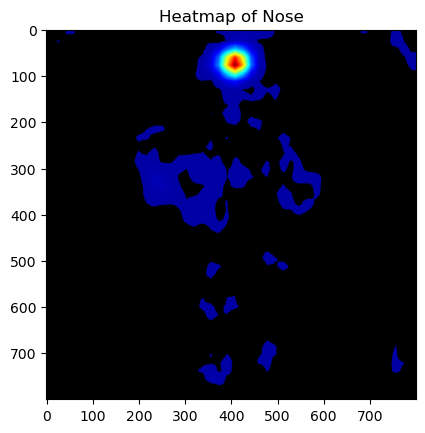

In [202]:
#plot heatmaps

def get_heatmap(frame, body_part="Nose"):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    # Assuming 'net' is a pre-loaded and pre-configured DNN model:
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # Assuming we need the first 19 elements (body parts)

    # Check if the specified body part is in the BODY_PARTS dictionary
    if body_part in BODY_PARTS:
        part_index = BODY_PARTS[body_part]
        heatMap = out[0, part_index, :, :]
    else:
        print("Invalid body part specified.")
        return None
    heatMap = cv.normalize(heatMap, None, 0, 255, cv.NORM_MINMAX)
    heatMap = cv.resize(heatMap, (frameWidth, frameHeight))

    # Applying a custom color map
    # Convert the heatmap to color using COLORMAP_JET for visual emphasis
    heatmap_color = cv.applyColorMap(cv.convertScaleAbs(heatMap, alpha=1), cv.COLORMAP_JET)
    
    # Create an emphasis mask where heatmap values are greater than a threshold
    mask = heatMap > np.percentile(heatMap, 90)  # Mask top 10% intense areas
    mask = np.uint8(mask) * 255
    
    # Isolate only the most intense parts of the heatmap
    nose_heatmap = cv.bitwise_and(heatmap_color, heatmap_color, mask=mask)

    return nose_heatmap

# Assuming 'frame' is the input image loaded via cv.imread() or similar
heatmap = get_heatmap(non_biker1, body_part="Nose")
plt.imshow(cv.cvtColor(heatmap, cv.COLOR_BGR2RGB))
plt.title('Heatmap of Nose')
plt.show()